/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


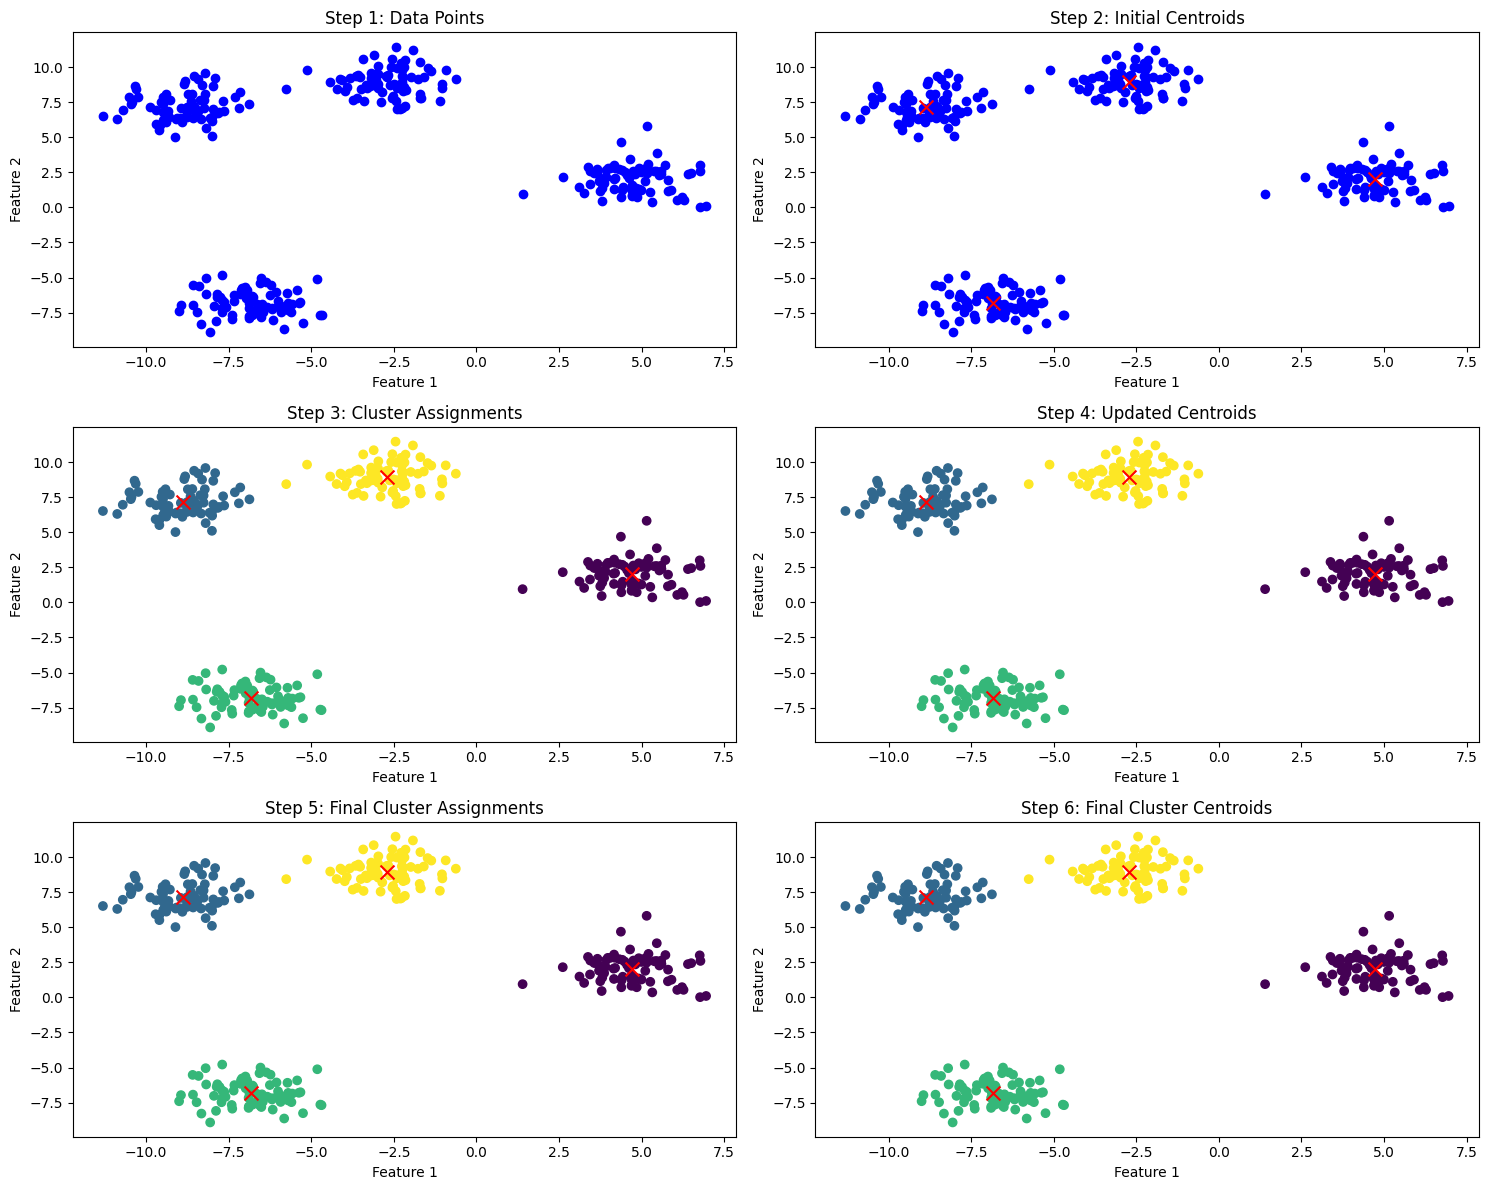

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data (you can replace this with your own dataset)
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 1: Choose the number of clusters (K) and initialize centroids
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')  # Using K-Means++ initialization

# Step 2: Assign each data point to the nearest centroid
cluster_labels = kmeans.fit_predict(data)

# Step 3: Update centroids as the mean of data points in each cluster
cluster_centers = kmeans.cluster_centers_

# Step 4: Iterate until convergence (or a maximum number of iterations)
max_iterations = 100
for _ in range(max_iterations):
    prev_centers = cluster_centers.copy()  # Store previous centroids for convergence check
    cluster_labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    if np.all(prev_centers == cluster_centers):
        break

# Step 5: Final Result - Cluster assignments and centroids
final_cluster_assignments = cluster_labels
final_cluster_centroids = cluster_centers

# Plot each step separately
plt.figure(figsize=(15, 12))

# Step 1: Data Points
plt.subplot(3, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.title('Step 1: Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 2: Initial Centroids
plt.subplot(3, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Step 2: Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 3: Cluster Assignments
plt.subplot(3, 2, 3)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Step 3: Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 4: Updated Centroids
plt.subplot(3, 2, 4)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Step 4: Updated Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 5: Final Cluster Assignments
plt.subplot(3, 2, 5)
plt.scatter(data[:, 0], data[:, 1], c=final_cluster_assignments, cmap='viridis')
plt.scatter(final_cluster_centroids[:, 0], final_cluster_centroids[:, 1], c='red', marker='x', s=100)
plt.title('Step 5: Final Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 6: Final Cluster Centroids
plt.subplot(3, 2, 6)
plt.scatter(data[:, 0], data[:, 1], c=final_cluster_assignments, cmap='viridis')
plt.scatter(final_cluster_centroids[:, 0], final_cluster_centroids[:, 1], c='red', marker='x', s=100)
plt.title('Step 6: Final Cluster Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()



import necessary lib and generate synthetic data

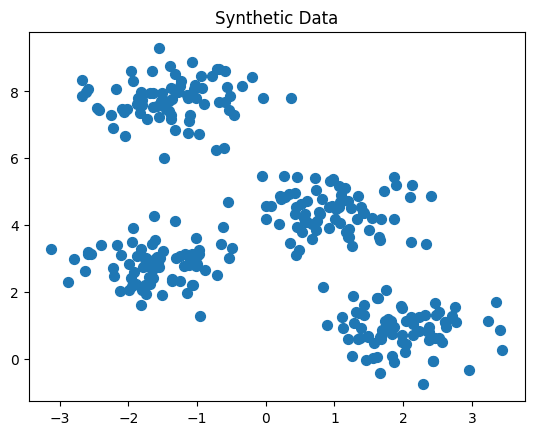

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with 4 clusters
X, _ = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data")
plt.show()


initialize the cluster

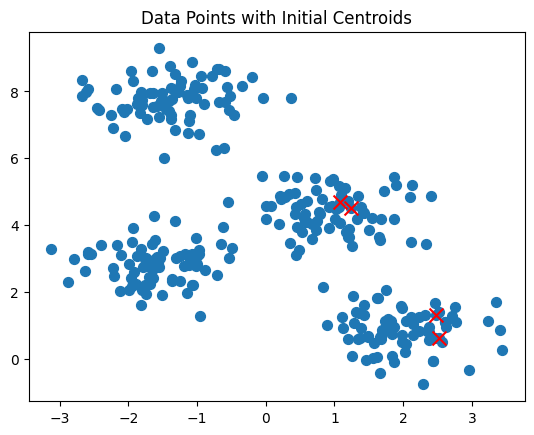

In [2]:
# Choose the number of clusters
k = 4

# Randomly initialize cluster centroids
np.random.seed(0)
initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Plot data points and initial centroids
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=100)
plt.title("Data Points with Initial Centroids")
plt.show()


Assign data points to the nearest cluster centroid.

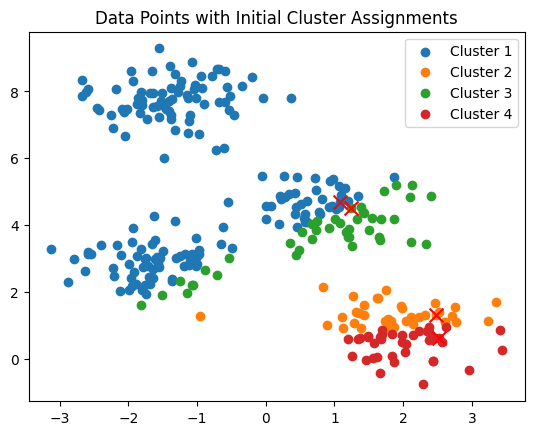

In [3]:
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Assign each data point to the nearest cluster
cluster_assignments = assign_clusters(X, initial_centroids)

# Plot data points with cluster assignments
for i in range(k):
    plt.scatter(X[cluster_assignments == i][:, 0], X[cluster_assignments == i][:, 1], label=f'Cluster {i + 1}')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=100)
plt.title("Data Points with Initial Cluster Assignments")
plt.legend()
plt.show()


 Update cluster centroids based on the mean of assigned data points.

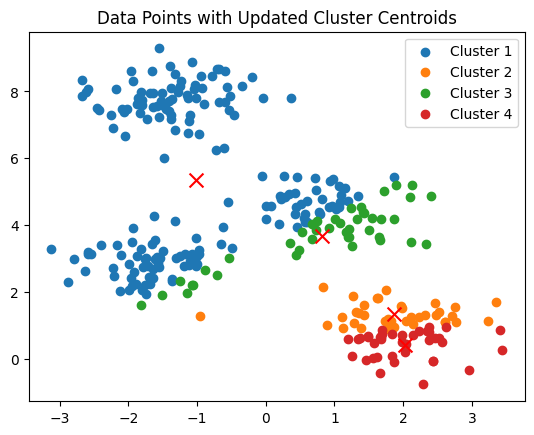

In [4]:
def update_centroids(X, cluster_assignments, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[cluster_assignments == i].mean(axis=0)
    return new_centroids

# Update cluster centroids
new_centroids = update_centroids(X, cluster_assignments, k)

# Plot data points with updated centroids
for i in range(k):
    plt.scatter(X[cluster_assignments == i][:, 0], X[cluster_assignments == i][:, 1], label=f'Cluster {i + 1}')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', marker='x', s=100)
plt.title("Data Points with Updated Cluster Centroids")
plt.legend()
plt.show()


Repeat steps 3 and 4 until convergence.

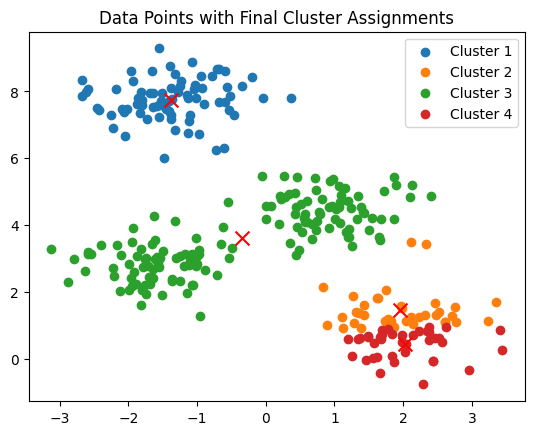

In [5]:
max_iterations = 10
for iteration in range(max_iterations):
    cluster_assignments = assign_clusters(X, new_centroids)
    new_centroids = update_centroids(X, cluster_assignments, k)

# Plot data points with final cluster assignments
for i in range(k):
    plt.scatter(X[cluster_assignments == i][:, 0], X[cluster_assignments == i][:, 1], label=f'Cluster {i + 1}')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', marker='x', s=100)
plt.title("Data Points with Final Cluster Assignments")
plt.legend()
plt.show()
